In [137]:
import numpy as np
import sympy
from sympy import S, symbols, Function, dsolve, solveset, linsolve, integrate, diff, plot, simplify, expand
from sympy import sin as Sin
from sympy import cos as Cos
from sympy import exp as Exp
from sympy import log as Log
from sympy import pi as Pi
import matplotlib.pyplot as plt

## Занятие 18
## Математический анализ
## Линейные ОДУ второго порядка с постоянными коэффициентами
### Задача 1
Решить ОДУ $3y''+5y'-2y=0$ по формуле из файла с примерами и с помощью dsolve.

Верное равенство = True


Формула найденной функции, ее первой и второй производной


C_1*exp(-2*x) + C_2*exp(x/3)

-2*C_1*exp(-2*x) + C_2*exp(x/3)/3

4*C_1*exp(-2*x) + C_2*exp(x/3)/9



dsolve


Eq(y(x), C1*exp(-2*x) + C2*exp(x/3))

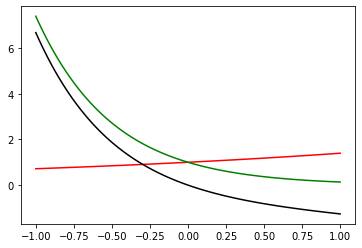

In [36]:
def y(x, C1, C2, lib='sympy'):
    if lib == 'sympy':
        return C1*Exp((-2)*x) + C2*Exp((S(1)/3)*x)
    if lib == 'numpy':
        return C1*np.exp((-2)*x) + C2*np.exp((1/3)*x)
    return 'error'


x, k, C1, C2 = symbols('x k C_1 C_2')
roots = solveset(3*k**2 + 5*k - 2)

# Проверим подстановкой, для этого методом diff найдем производные первого и второго порядка и подставим у ОДУ,
a = 3 * diff(y(x, C1, C2), x, 2)
b = 5 * diff(y(x, C1, C2), x)
c = 2 * y(x, C1, C2)
expression = sympy.collect(a + b - c, Exp(2*x))
print("Верное равенство =", expression == 0)
print()
print()

# Выведем также формулу для самой найденной функции , ее первой и второй производной
print("Формула найденной функции, ее первой и второй производной")
display(y(x, C1, C2))
display(diff(y(x, C1, C2), x))
display(diff(y(x, C1, C2), x, 2))
print()
print()

# Решение с помощью dsolve
y_func = Function('y')
print("dsolve")
display(dsolve(3*y_func(x).diff(x, 2) + 5*y_func(x).diff(x) - 2*y_func(x), y_func(x)))
print()
print()


# Построим график нескольких решений этого ОДУ
X = np.linspace(-1, 1, 100)
for (c1, c2, col) in ((0, 1, 'red'), (1, 0, 'green'), (1, -1, 'black')):
    plt.plot(X, y(X, c1, c2, lib='numpy'), col)

### Задача 2.
Решить задачу Коши:
$$
\left\{
\begin{matrix}
9y''+3y'+y=0\\
y(0)=0\\
y'(0)=2\sqrt3
\end{matrix}
\right.
$$
##### Указание.
Решить с помощью dsolve, затем составить словарь символов решения, ключи - 'x', 'C1', 'C2', а значения - соответствующие элементы из множества  ХХХ.rhs.free_symbols, решить систему линейных относительно С1 и С2 уравнений, описывающих начальные условия.

In [104]:
# Решить с помощью dsolve, затем составить словарь символов решения, ключи - 'x', 'C1', 'C2', а значения - соответствующие элементы из множества  ХХХ.rhs.free_symbols
y = Function('y')
answer = dsolve(9*y(x).diff(x, 2) + 3*y(x).diff(x) + 1*y(x), y(x))
variables = {str(item): item for item in answer.rhs.free_symbols}
print("Общее решение и словарь символов решения")
display(answer.rhs)
print(variables)
print()
print()

# Решить систему линейных относительно С1 и С2 уравнений, описывающих начальные условия
eq1 = simplify(answer.rhs)
eq2 = simplify(answer.rhs.diff(x) - 2 * sympy.sqrt(3))
print("Уравнения")
display(eq1, eq2)
print()
print()

print("Решение под simplify")
solved = linsolve([eq1, eq2], list(answer.rhs.free_symbols)[:2])
display(simplify(list(solved)[0][0]))
print()
print()

Общее решение и словарь символов решения


(C1*sin(sqrt(3)*x/6) + C2*cos(sqrt(3)*x/6))*exp(-x/6)

{'C1': C1, 'C2': C2, 'x': x}


Уравнения


(C1*sin(sqrt(3)*x/6) + C2*cos(sqrt(3)*x/6))*exp(-x/6)

(C1*cos(sqrt(3)*x/6 + pi/6) - C2*sin(sqrt(3)*x/6 + pi/6) - 6*sqrt(3)*exp(x/6))*exp(-x/6)/3



Решение под simplify


12*exp(x/6)*cos(sqrt(3)*x/6)

### Индивидуальное задание
Решить с помощью dsolve:
$$
y''' + y'' + y' + y = (4x + 6)e^{2x}.
$$
Построить график $y(x)$ при начальных условиях $y(0) = 4$, $y'(0) = 2$, $y''(0) = 0$.

Общее решение


C1*exp(-x) + C2*sin(x) + C3*cos(x) + 2*(30*x + 11)*exp(2*x)/225



Уравнения


C1 + C3 - 878/225

-C1 + C2 - 346/225

C1 - C3 + 328/225



Решения под simplify


69/25

11/9

67/25



График


2*(30*x + 11)*exp(2*x)/225 + 11*sin(x)/9 + 67*cos(x)/25 + 69*exp(-x)/25

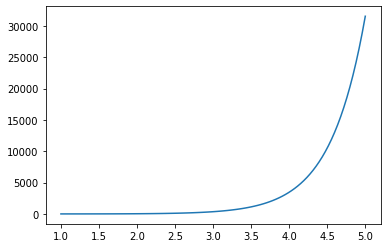

In [149]:
# Решить с помощью dsolve
y = Function('y')
answer = dsolve(y(x).diff(x, 3) + y(x).diff(x, 2) + y(x).diff(x) + y(x) - (4*x+6)*Exp(2*x), y(x))
print("Общее решение")
display(answer.rhs)
print()
print()

# Решить систему линейных относительно С1 и С2 уравнений, описывающих начальные условия
eq1 = simplify(expand(answer.rhs - 4))
eq2 = simplify(expand(answer.rhs.diff(x) - 2))
eq3 = simplify(expand(answer.rhs.diff(x, 2)))

eq1 = simplify(expand(answer.rhs - 4)).subs({"x": 0})
eq2 = simplify(expand(answer.rhs.diff(x) - 2)).subs({"x": 0})
eq3 = simplify(expand(answer.rhs.diff(x, 2))).subs({"x": 0})

print("Уравнения")
display(eq1, eq2, eq3)
print()
print()

print("Решения под simplify")
solved = linsolve([eq1, eq2, eq3], list(answer.rhs.free_symbols)[:3])
for item in list(solved)[0]:
    display(simplify(expand(item)))
print()
print()

print("График")
func_to_draw = answer.rhs.subs({"C1": S(69)/25, "C2": S(11)/9, "C3": S(67)/25})
display(func_to_draw)
X = np.linspace(1, 5, 100)
plt.plot(X, 2*(30*X+11)*np.exp(2*X)/225 + 11*np.sin(X)/9 + 67 * np.cos(X)/25 +  69 * np.exp(-X) / 25)
plt.show()